Importing the necessary **Deep learning** packages also **VGG16** pretrained architecture with **imagenet** weights

In [1]:
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator,load_img

from keras.applications.vgg16 import VGG16
from keras import backend as K

vgg16 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 6s 0us/step


The size of an input image for VGG16 is predefined and it is **224x224** 

---

Defining the input shape of the image with rgb channels(3) by checking if backend is **tensorflow** or not

In [0]:
img_height = 224
img_width = 224
batch_size=20
if K.image_data_format()=='channels_first':
  input_shape = (3,img_width,img_height)
else:
  input_shape = (img_width,img_height,3)

model summary of vgg16 model before **fine tuning**



In [3]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Finetuning the VGG16 model to the sequential model and adding some layers then
Disabling the **trainable mode** of vgg16 layers to prevent them train again and again

In [0]:
model = models.Sequential()
model.add(vgg16)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
vgg16.trainable = False

After **fine tuning** the **model summary** looks like

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


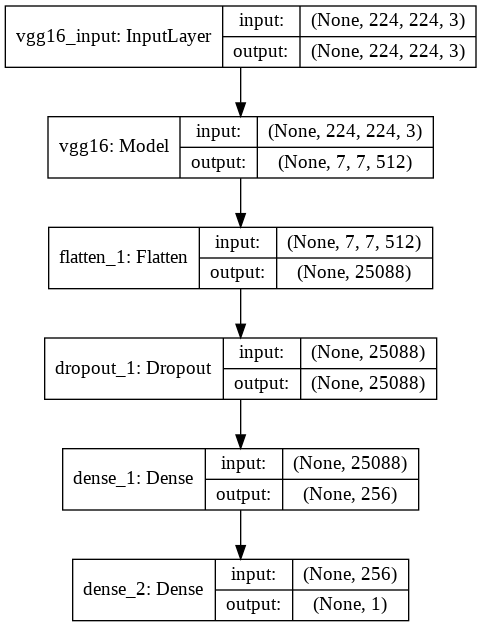

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Compiling the model with **Binary Crossentropy** loss since classification is between only 2 classes and optimizer is **adam** with **learning rate 0.001**

In [0]:
import keras
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

The following cells perform **Image augmentation**

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip = True
)

In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_dir='drive/My Drive/cats_dogs/train'
validation_data_dir = 'drive/My Drive/cats_dogs/validation'
test_data_dir = 'drive/My Drive/cats_dogs/test'

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size= (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [0]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode = 'binary'
)

Found 600 images belonging to 2 classes.


In [0]:
test_generator = ImageDataGenerator().flow_from_directory(
    test_data_dir,
    target_size=(img_width,img_height),
    batch_size=10,
    classes = ['cats','dogs']
)

Found 20 images belonging to 2 classes.


Training the **model**

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50, # batches in the generator are 32, so it takes 320 batches to get to 16000 images
    epochs=100,
    validation_data=validation_generator,
    validation_steps=25)

Epoch 1/100
50/50 [==============================] - 614s 12s/step - loss: 0.9369 - accuracy: 0.6500 - val_loss: 0.3472 - val_accuracy: 0.8380
Epoch 2/100
50/50 [==============================] - 344s 7s/step - loss: 0.3554 - accuracy: 0.8400 - val_loss: 0.1581 - val_accuracy: 0.8820
Epoch 3/100
50/50 [==============================] - 16s 317ms/step - loss: 0.2346 - accuracy: 0.9130 - val_loss: 0.3611 - val_accuracy: 0.8700
Epoch 4/100
50/50 [==============================] - 16s 319ms/step - loss: 0.2856 - accuracy: 0.8750 - val_loss: 0.1925 - val_accuracy: 0.9240
Epoch 5/100
50/50 [==============================] - 16s 313ms/step - loss: 0.2342 - accuracy: 0.9050 - val_loss: 0.1954 - val_accuracy: 0.9040
Epoch 6/100
50/50 [==============================] - 16s 314ms/step - loss: 0.2357 - accuracy: 0.8910 - val_loss: 0.1925 - val_accuracy: 0.9180
Epoch 7/100
50/50 [==============================] - 16s 316ms/step - loss: 0.2228 - accuracy: 0.9090 - val_loss: 0.1859 - val_accuracy: 0.

Plotting the model **accuracy** and **loss** curves during training

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


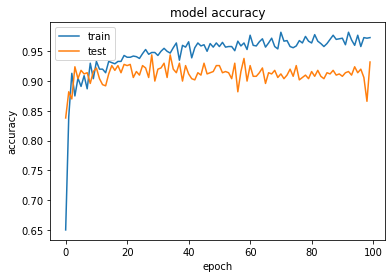

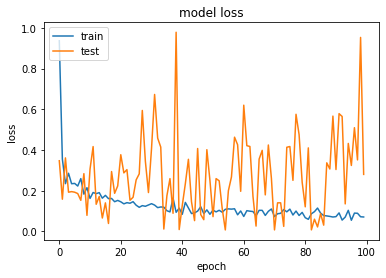

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The following cells perform predicting the test images

In [0]:
import numpy as np
from os import listdir
from os.path import isfile,join

predict_cats_dir_path='drive/My Drive/cats_dogs/test/cats/'
predict_dogs_dir_path='drive/My Drive/cats_dogs/test/dogs/'

only_cat_files = [f for f in listdir(predict_cats_dir_path) if isfile(join(predict_cats_dir_path, f))]
only_dog_files = [f for f in listdir(predict_dogs_dir_path) if isfile(join(predict_dogs_dir_path, f))]

only_files = only_cat_files+only_dog_files
print(only_files)

['cat.4995.jpg', 'cat.4993.jpg', 'cat.4999.jpg', 'cat.4997.jpg', 'cat.4994.jpg', 'cat.4996.jpg', 'cat.5000.jpg', 'cat.4992.jpg', 'cat.4991.jpg', 'cat.4998.jpg', 'dog.4994.jpg', 'dog.4995.jpg', 'dog.4997.jpg', 'dog.5000.jpg', 'dog.4991.jpg', 'dog.4993.jpg', 'dog.4999.jpg', 'dog.4996.jpg', 'dog.4992.jpg', 'dog.4998.jpg']


In [0]:
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in only_cat_files:
    img = image.load_img(predict_cats_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1

for file in only_dog_files:
    img = image.load_img(predict_dogs_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1

print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

cat.4995.jpg: dog
cat.4993.jpg: cat
cat.4999.jpg: cat
cat.4997.jpg: cat
cat.4994.jpg: dog
cat.4996.jpg: cat
cat.5000.jpg: cat
cat.4992.jpg: dog
cat.4991.jpg: cat
cat.4998.jpg: cat
Total cat : 7
Total dog : 3


saving the model

In [0]:
model.save('cats_dogs_vgg16.h5')

Plotting the **confusion matrix** to know the test accuracy

In [0]:

def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("confusion matrix, without normalization")
  print(cm)
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [0]:
def plots(ims, figsize=(12,6), rows=1, Interp=False, titles=None):
  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8) 
    if (ims.shape[-1] != 3):
      ims = ims. transpose (2,2,3,1) 
  f=plt.figure(figsize=figsize) 
  cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows+1
  for i in range(len(ims)):
    sp= f.add_subplot(rows, cols, i+1) 
    sp.axis('Off') 
    if titles is not None:
      sp.set_title(titles[i], fontsize=16) 
    plt.imshow(ims[i], interpolation=None if Interp else 'none')

In [0]:
imgs,labels = next(test_generator)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


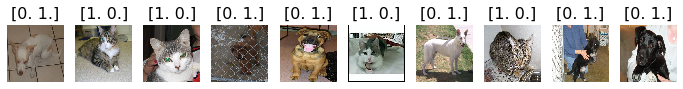

In [0]:
plots(imgs,titles=labels)

In [0]:
labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
labels=labels[:,1]

In [0]:
labels

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 1.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_generator,steps=1,verbose=0)

In [0]:
predictions

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [0]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(labels,predictions)

confusion matrix, without normalization
[[3 1]
 [0 6]]


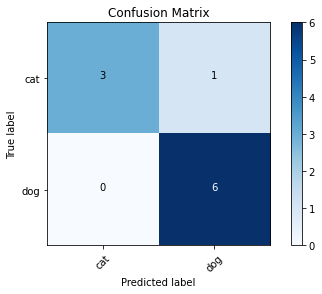

In [0]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

calculating the Test accuracy

In [0]:
sum_pred = cm[0][0]+cm[1][1]
total = len(labels)
accuracy = sum_pred/total * 100
print(accuracy)

90.0
